# Project 
Authors: Joseph Weibel, Rebecka Fahrni

Data: Sleep-EDF of PhysioNet

## Project Part 1: Data Exploration

Still need to do more data cleaning and preprocessing: we have a lot of missing data still (sleep stage ?)

In [1]:
import seaborn as sns
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.io import read_raw_edf
from mne.datasets import sleep_physionet

In [2]:
# needs to be downloaded age_record metadata
csv_path = 'data/age_records.csv'
age_data = pd.read_csv(csv_path)
valid_subjects = [i for i in range(83) if i not in [36, 39, 68, 52, 69, 78, 79, 13]]#  missing subjects
data_path = sleep_physionet.age.fetch_data(subjects=valid_subjects, recording=[1])  # 37 males and 41 females in the dataset

subject_age_mapping = age_data[["subject", "age"]].drop_duplicates().set_index("subject").to_dict()["age"]
# remove subjects with missing age data or generally missing data
valid_subjects = [i for i in range(83) if i not in [36, 39, 68, 52, 69, 78, 79, 13, 83]]  # Remove subjects with known issues
valid_subjects = [s for s in valid_subjects if (subject_age_mapping.get(s + 1, None) is not None)] #
data_path = sleep_physionet.age.fetch_data(subjects=valid_subjects, recording=[1])
participant_ages = [subject_age_mapping[s + 1] for s in valid_subjects]
record_paths = [record[0] for record in data_path]
assert len(record_paths) == len(participant_ages)



Using default location ~/mne_data for PHYSIONET_SLEEP...


Using default location ~/mne_data for PHYSIONET_SLEEP...


### looking into the Meta data

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8405999  =      0.000 ... 84059.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8411999  =      0.000 ... 84119.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8459999  =      0.000 ... 84599.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4041E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7709999  =      0.000 ... 77099.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4051E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8165999  =      0.000 ... 81659.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4061E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8309999  =      0.000 ... 83099.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4071E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8429999  =      0.000 ... 84299.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4081E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8387999  =      0.000 ... 83879.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4091E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8195999  =      0.000 ... 81959.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4101E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8159999  =      0.000 ... 81599.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4111E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7925999  =      0.000 ... 79259.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4121E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8357999  =      0.000 ... 83579.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4141E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8267999  =      0.000 ... 82679.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4151E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7859999  =      0.000 ... 78599.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4161E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7877999  =      0.000 ... 78779.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4171E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8225999  =      0.000 ... 82259.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4181E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8267999  =      0.000 ... 82679.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4191E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8321999  =      0.000 ... 83219.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4201E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8411999  =      0.000 ... 84119.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4211E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8429999  =      0.000 ... 84299.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4221E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8099999  =      0.000 ... 80999.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4231E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8237999  =      0.000 ... 82379.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4241E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8105999  =      0.000 ... 81059.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4251E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8279999  =      0.000 ... 82799.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4261F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8399999  =      0.000 ... 83999.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4271F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7319999  =      0.000 ... 73199.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4281G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8363999  =      0.000 ... 83639.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4291G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8267999  =      0.000 ... 82679.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4301E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7937999  =      0.000 ... 79379.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4311E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8009999  =      0.000 ... 80099.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4321E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8069999  =      0.000 ... 80699.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4331F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8429999  =      0.000 ... 84299.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4341F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8249999  =      0.000 ... 82499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4351F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8129999  =      0.000 ... 81299.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4371F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8549999  =      0.000 ... 85499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4381F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8249999  =      0.000 ... 82499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4401E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7889999  =      0.000 ... 78899.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4411E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8183999  =      0.000 ... 81839.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4421E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8291999  =      0.000 ... 82919.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4431E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8429999  =      0.000 ... 84299.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4441E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7859999  =      0.000 ... 78599.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4451F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8369999  =      0.000 ... 83699.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4461F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8087999  =      0.000 ... 80879.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4471F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8219999  =      0.000 ... 82199.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4481F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8639999  =      0.000 ... 86399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4491G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8399999  =      0.000 ... 83999.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4501E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8249999  =      0.000 ... 82499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4511E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8135999  =      0.000 ... 81359.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4531E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7805999  =      0.000 ... 78059.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4541F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8219999  =      0.000 ... 82199.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4551F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8315999  =      0.000 ... 83159.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4561F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8111999  =      0.000 ... 81119.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4571F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8549999  =      0.000 ... 85499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4581G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8213999  =      0.000 ... 82139.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4591G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8459999  =      0.000 ... 84599.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4601E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8189999  =      0.000 ... 81899.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4611E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4621E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7835999  =      0.000 ... 78359.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4631E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8273999  =      0.000 ... 82739.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4641E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8039999  =      0.000 ... 80399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4651E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8579999  =      0.000 ... 85799.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4661E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8219999  =      0.000 ... 82199.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4671G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8339999  =      0.000 ... 83399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4701E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8039999  =      0.000 ... 80399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4711E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8189999  =      0.000 ... 81899.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4721E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7025999  =      0.000 ... 70259.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4731E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8339999  =      0.000 ... 83399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4741E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8069999  =      0.000 ... 80699.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4751E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8039999  =      0.000 ... 80399.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4761E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7889999  =      0.000 ... 78899.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4771G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8267999  =      0.000 ... 82679.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4801G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8321999  =      0.000 ... 83219.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4811G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7205999  =      0.000 ... 72059.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4821G0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8165999  =      0.000 ... 81659.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_27508\894428373.py:8: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


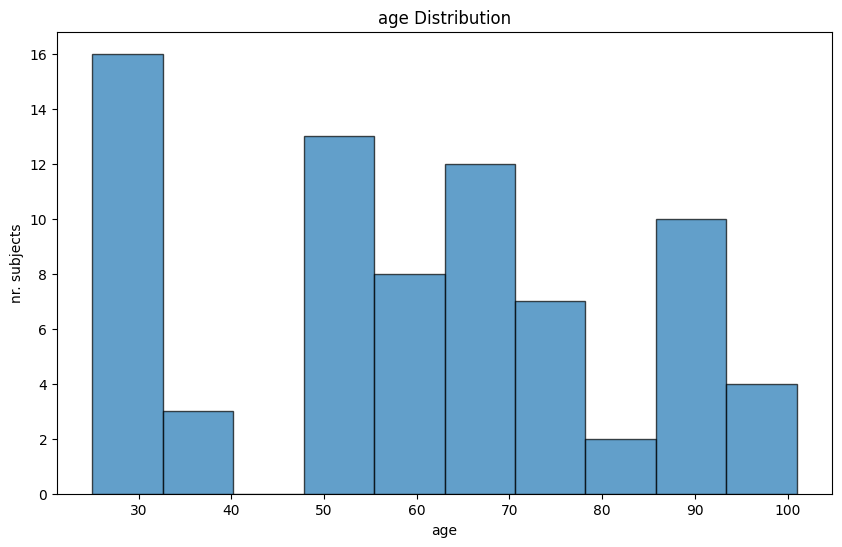

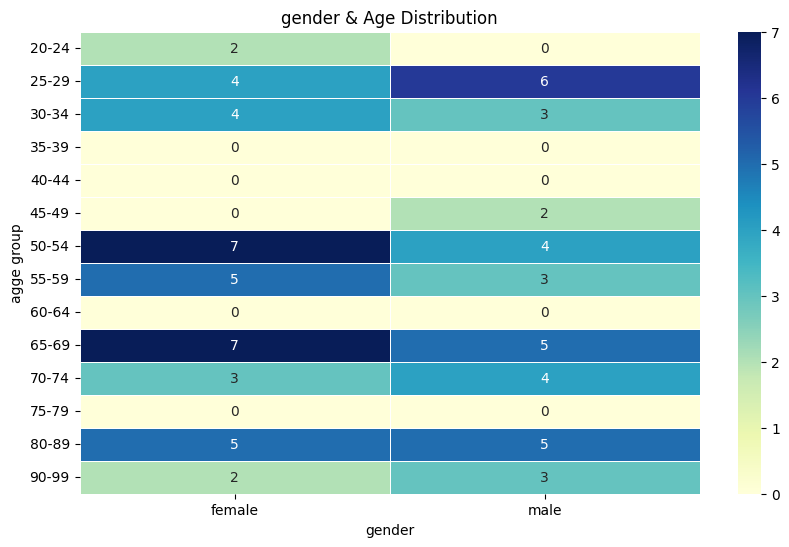

In [3]:


valid_subjects = [i for i in range(83) if i not in [36, 39, 68, 52, 69, 78, 79, 13]]
data_path = sleep_physionet.age.fetch_data(subjects=valid_subjects, recording=[1])
participant_ages = []
participant_gender = []

for i, edf_path in enumerate([record[0] for record in data_path]):
    
    raw = mne.io.read_raw_edf(edf_path, preload=True)
    subject_info = raw.info.get('subject_info', {})

    if 'last_name' in subject_info:
        age_str = subject_info['last_name'] # should be age: but unformunately it is written wrongly in the dataset
        age = int(age_str.rstrip('yr'))  
        participant_ages.append(age)
    else:
        continue  # skip if age is missing

    if 'sex' in subject_info:
        gender = 'male' if subject_info['sex'] == 1 else 'female'
        participant_gender.append(gender)


#if len(participant_ages) != len(participant_gender):
    #raise ValueError("mismatch participant ages and gender")

# remove values that are None
participant_ages = [age for age in participant_ages if age is not None]

# age distribution
plt.figure(figsize=(10, 6))
plt.hist(participant_ages, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("age")
plt.ylabel("nr. subjects")
plt.title("age Distribution")
plt.show()


age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
age_labels = [f"{age_bins[i]}-{age_bins[i+1] - 1}" for i in range(len(age_bins) - 1)]
data = pd.DataFrame({'age': participant_ages, 'gender': participant_gender})
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
gender_age_pivot = data.pivot_table(index='age_group', columns='gender', values='age', aggfunc='count', fill_value=0)

# gender and age distribution
plt.figure(figsize=(10, 6))
sns.heatmap(gender_age_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=True)
plt.title("gender & Age Distribution")
plt.xlabel("gender")
plt.ylabel("agge group")
plt.show()


### General information about raw data

In [130]:
raw.info

Measurement date,"April 24, 1989 16:13:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,7 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


### General information about annotaion data 

In [190]:


raw.annotations # get the annotations/conditons from the other file edf ! 

<Annotations | 0 segments>

### Looking into the 9th subject/participant to learn more from data

Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4091E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8195999  =      0.000 ... 81959.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2882737720.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(record_paths[9],
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2882737720.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(record_paths[9],
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2882737720.py:2: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(record_paths[9],


<Info | 8 non-empty values
 bads: []
 ch_names: Fpz-Cz, Pz-Oz, horizontal, oro-nasal, submental, rectal, Event ...
 chs: 2 EEG, 1 EOG, 1 Respiration monitoring channel, 1 EMG, 1 Temperature, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-06-05 16:24:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>


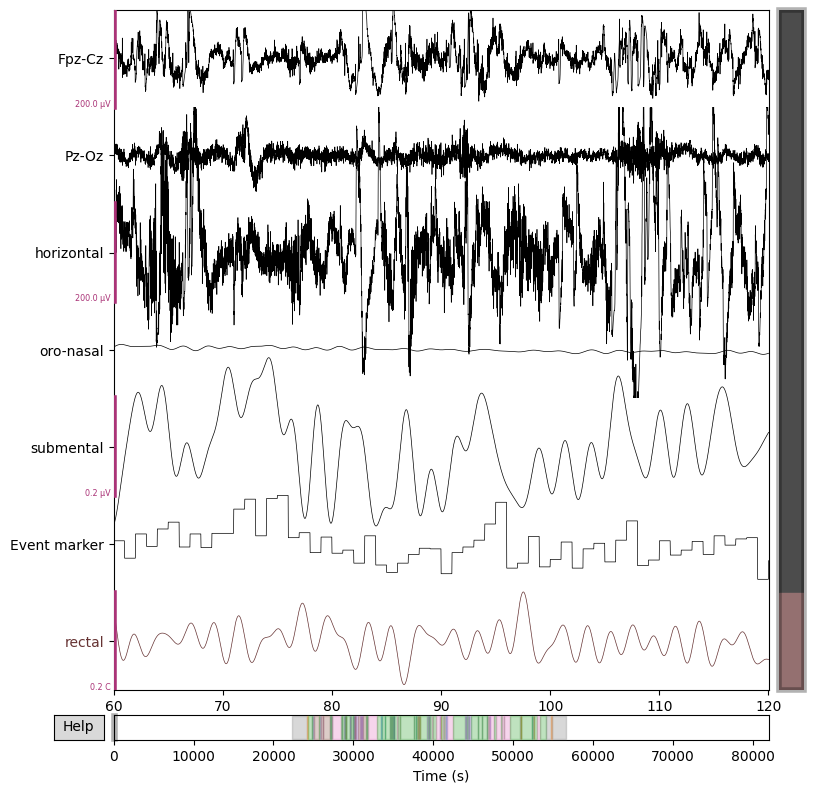

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2882737720.py:25: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  psd.plot()
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2882737720.py:25: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
c:\Users\rebec\miniconda3\envs\GPU-new\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


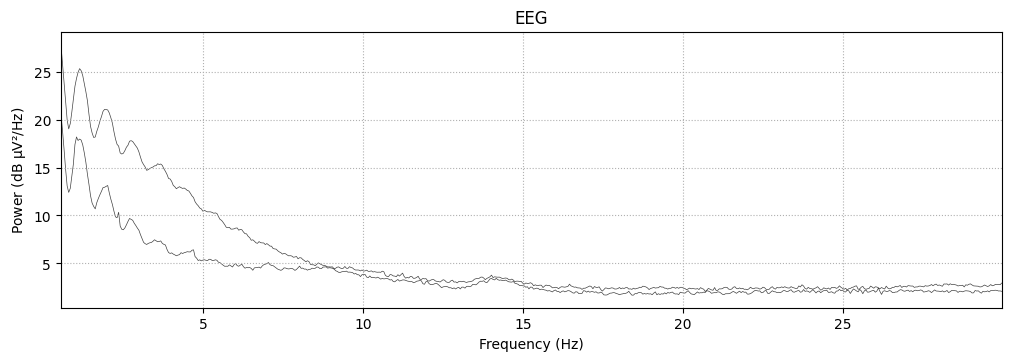

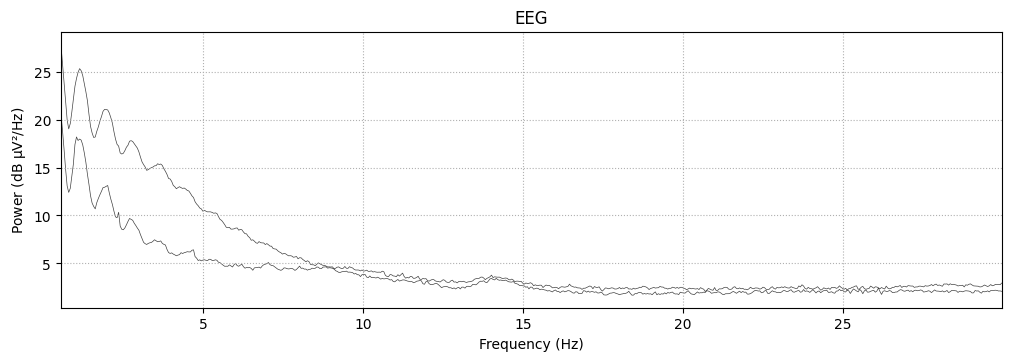

In [199]:

record_paths = [record[0] for record in data_path] 
raw = read_raw_edf(record_paths[9],
                   stim_channel='Event marker',
                   infer_types=True,
                   preload=True)
annot_raw = mne.read_annotations(data_path[9][1]) # annotation is in the second file edf of each record 

if len(annot_raw) > 0:
    annot_raw.crop(annot_raw[1]["onset"] - 30 * 60, annot_raw[-2]["onset"] + 30 * 60) # keep last 30-min wake events before sleep and first 30-min wake events after
    raw.set_annotations(annot_raw, emit_warning=False)
else:
    print("skip if no annot")

raw.set_annotations(annot_raw, emit_warning=False)
print(raw.info)

raw.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1),
)

# psd of subject 9 recording 1
psd = raw.compute_psd(method='welch', fmin=0.5, fmax=30)  # compute PSD
psd.plot()  




we see 2 EEG channels and in total 7 channels of data

#### in this dataset we have 8 annotated labels : Wake, stage 1. stage 2, stage 3, stage 4 - light sleep to deep sleep and REM , M (movement and ? for any none scored)



In [36]:
annot_raw

<Annotations | 147 segments: Movement time (10), Sleep stage 1 (10), Sleep ...>

In [38]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

# keep last 30-min wake events before sleep and first 30-min wake events after

events, _ = mne.events_from_annotations(
    raw, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


In [39]:
events


array([[2235000,       0,       1],
       [2238000,       0,       1],
       [2241000,       0,       1],
       ...,
       [5655000,       0,       1],
       [5658000,       0,       1],
       [5661000,       0,       1]])

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\4112073620.py:9: RuntimeWarning: event 5 missing from event_id will be ignored
  mne.viz.plot_events(
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\4112073620.py:9: RuntimeWarning: event 6 missing from event_id will be ignored
  mne.viz.plot_events(
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\4112073620.py:9: RuntimeWarning: event 7 missing from event_id will be ignored
  mne.viz.plot_events(


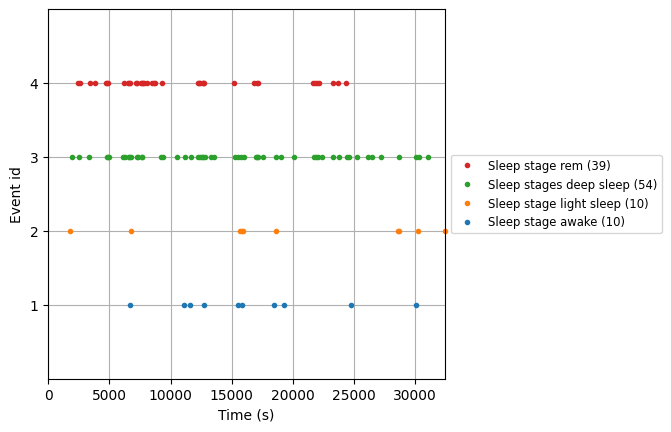

In [142]:
# we want to define our own event ids
event_id = {
        "Sleep stage awake": 1,        # wake
        "Sleep stage light sleep": 2, # light sleep
        "Sleep stages deep sleep": 3, # deep sleep
        "Sleep stage rem": 4,         # REM
    }

    
mne.viz.plot_events(
        events,
        event_id=event_id,
        sfreq=raw.info["sfreq"],
        first_samp=events[0,0],  
    )

stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]



### creating Epochs from data based on events found in annotation 

In [143]:
tmax = 30.0 - 1.0 / raw.info["sfreq"]  # tmax in included

epochs = mne.Epochs(
    raw=raw,
    events=events,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)

print(epochs)

Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  113 events (good & bad), 0 – 29.99 s, baseline off, ~7 kB, data not loaded,
 'Sleep stage awake': 10
 'Sleep stage light sleep': 10
 'Sleep stages deep sleep': 54
 'Sleep stage rem': 39>


### PSD plot of 9th subject 

Using data from preloaded Raw for 19 events and 3000 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...
Using data from preloaded Raw for 170 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...
Using data from preloaded Raw for 150 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...
Using data from preloaded Raw for 561 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


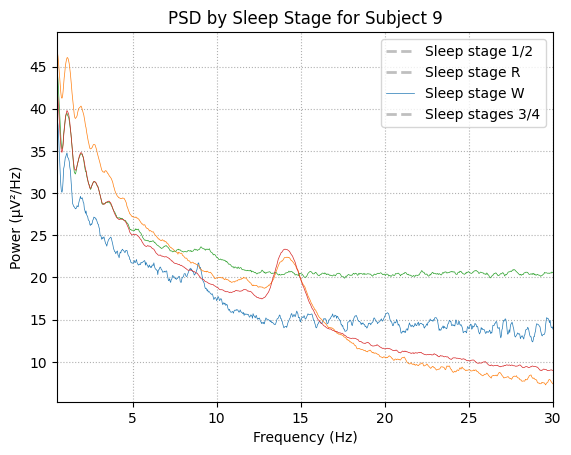

In [123]:
from itertools import cycle 

fig, ax = plt.subplots(ncols=1)  
stages = sorted(event_id.keys())   # ['Sleep stage 1/2', 'Sleep stage R', 'Sleep stage W', 'Sleep stages 3/4']
colors = cycle(['b', 'g', 'r', 'c'])  

for stage, color in zip(stages, stage_colors):
    
    if stage in epochs.event_id:
        spectrum = epochs[stage].compute_psd(fmin=0.5, fmax=30)  
        liney = spectrum.plot(
            ci=None,
            color=color,  
            axes=ax,
            show=False,
            average=True,
            amplitude=False,
            spatial_colors=False,
            picks="data",
            exclude="bads",
        )
       
    
ax.set_title("PSD by Sleep Stage for Subject 9")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (µV²/Hz)")
ax.legend(stages)
plt.show()



plotting is sub-optimal, but we can see the difference in the power spectrum of the different sleep stages. We can infer that REM and awake stages have higher power in the higher frequencies, while deep sleep stages have higher power in the lower frequencies.

### now we want to average across multiple subjects (preferly all - but we have to do some data clearning before, some still hav e missing data) 


In [196]:
data_path


[['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4001E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4001EC-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4011E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4011EH-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4021E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4021EH-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4031E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4031EC-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4041E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4041EC-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4051E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4051EC-Hypnogram.edf'], ['C:\\Users\\rebec\\mne_data\\physionet-sleep-data\\SC4061E0-PSG.edf', 'C:\\Users\\rebec\\mne_data\\physionet-s

In [197]:
raw.ch_names

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']

Average channel response - PSD plot

In [200]:
unique_annotations = list(set(raw.annotations.description)) 
unique_annotations # for this subject no missing sleep stage: sleep stage ? 

['Movement time', 'Sleep stage R', 'Sleep stage W', 'Sleep stage 4', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3']

Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 841 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4011E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1103 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4021E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1025 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1025 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4031E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 952 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4041E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1235 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1235 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4051E0-PSG.edf...
EDF file detecte

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
672 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 672 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4061E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4071E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
976 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 976 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4081E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1134 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1134 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4091E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1132 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1132 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4101E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1104 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1104 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4111E0-PSG.edf...
EDF file detecte

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
928 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 928 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4121E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1783 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1783 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4141E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1004 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4151E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 952 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4161E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1144 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4171E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1002 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4181E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 964 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4191E0-PSG.edf...
E

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1535 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1535 events and 3001 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4201E0-PSG.edf...

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1265441168.py:12: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1022 events and 3001 original time points ...
0 bad epochs dropped


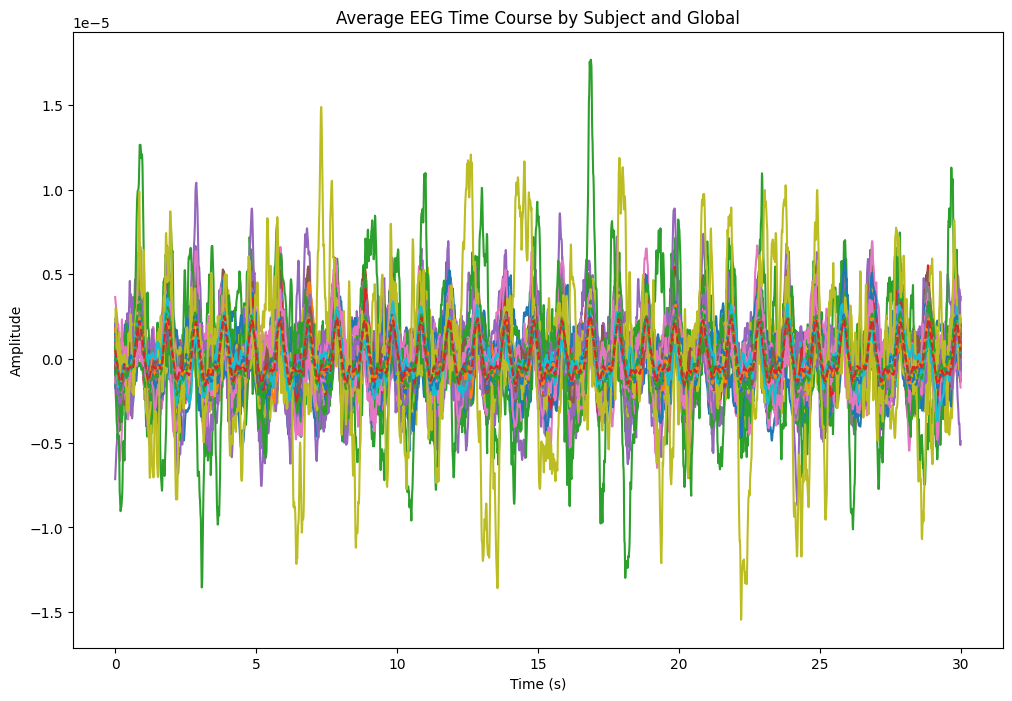

In [207]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne import pick_types
from mne.io import read_raw_edf


conditions = ['Sleep stage awake', 'Sleep stage light sleep', 'Sleep stages deep sleep', 'Sleep stage rem']
subject_averages = {}
for paths in data_path[:20]:
    rawpath, annotpath = paths[0], paths[1]
    raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)  # Load EEG data
    eeg_channels = pick_types(raw.info, eeg=True)  # Pick only EEG channels
    raw.pick(eeg_channels)  # Keep only EEG channels
    raw.filter(0.5, 30)  # band-pass filter
    annot = mne.read_annotations(annotpath)  
    raw.set_annotations(annot, emit_warning=False) 
    
    # since sleep stage ? and other labels - we only want to work with 5 
    annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4,
} 
    annot.crop(annot[1]["onset"] - 30 * 60, annot[-2]["onset"] + 30 * 60)
    raw.set_annotations(annot, emit_warning=False)

    events, _ = mne.events_from_annotations(
    raw, event_id=annotation_desc_2_event_id, chunk_duration=30.0)
    # new event id
    event_id = {
        "Sleep stage awake": 1,        # wake
        "Sleep stage light sleep": 2, # light sleep
        "Sleep stages deep sleep": 3, # deep sleep
        "Sleep stage rem": 4,         # REM
    }
    tmin = 0.0  
    tmax = 30.0  
    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, preload=True, baseline=None)
    subject_id = rawpath.split('/')[-1]  
    subject_averages[subject_id] = {cond: epochs[cond].average() for cond in conditions}

plt.figure(figsize=(12, 8))

# average time course for each condition for each subject
for subject, averages in subject_averages.items():
    for condition, evoked in averages.items():
        times = evoked.times  
        data = evoked.data.mean(axis=0)  # mean across channels for each time point 
        
        plt.plot(times, data, label=f"{subject} - {condition}")  

# global average across all subjects and conditions
global_averages = {cond: [] for cond in conditions}

for subject, averages in subject_averages.items():
    for condition in conditions:
        if condition in averages:
            global_averages[condition].append(averages[condition].data)

# glob average for each condition
for condition, data_list in global_averages.items():
    if data_list:  # Ensure the list is not empty
        avg_data = np.mean([data.mean(axis=0) for data in data_list], axis=0)  
        plt.plot(times, avg_data, label=f"Global - {condition}", linestyle='--')  


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Average EEG Time Course by Subject and Global")
plt.show()


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage W']
Not setting metadata
1997 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1997 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4011E0-PSG.edf...
EDF fil

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage W']
Not setting metadata
1856 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1856 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4021E0-PSG.edf...
EDF fil

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage W']
Not setting metadata
1907 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1907 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4031E0-PSG.edf...
EDF fil

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage W']
Not setting metadata
2008 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2008 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4041E0-PSG.edf...
EDF fil

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\1098577446.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage W']
Not setting metadata
1534 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1534 events and 3001 original time points ...
1 bad epochs dropped


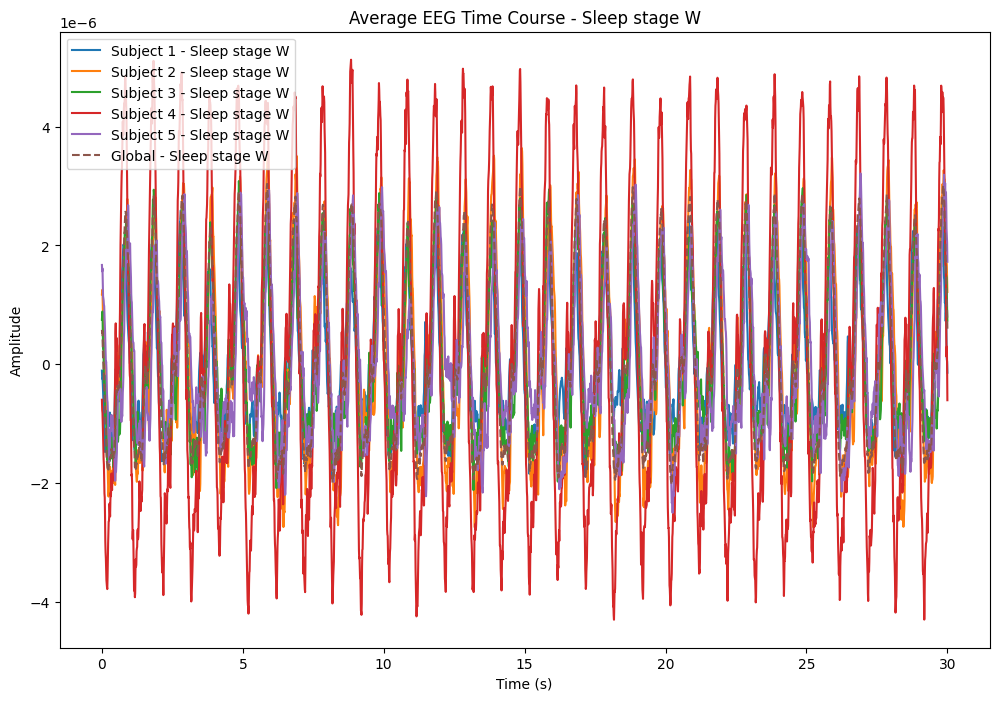

In [203]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_edf

conditions = ['Sleep stage W'] # define conditions
subject_averages = {}

for idx, paths in enumerate(data_path[:5], start=1):
    rawpath, annotpath = paths[0], paths[1]
    raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True) 
    raw.pick_types(eeg=True)  # only EEG channels
    raw.filter(0.5, 30)  #  band-pass filter
    annot = mne.read_annotations(annotpath) 
    raw.set_annotations(annot, emit_warning=False)
    
    #if raw.annotations is None:
    #   raise ValueError(f"No annotations found for {rawpath}")

    annotation_desc_2_event_id = {
        "Sleep stage W": 1,
        # other stages r removed 
    }

    events, _ = mne.events_from_annotations(
        raw, event_id=annotation_desc_2_event_id, chunk_duration=30.0)

    event_id = {
        "Sleep stage W": 1, 
    }

    tmin = 0.0  
    tmax = 30.0  
    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, preload=True, baseline=None)

    #if len(epochs) == 0:
    #   raise ValueError(f"No valid epochs found for {rawpath}")

    subject_id = f"Subject {idx}"
    subject_averages[subject_id] = {conditions[0]: epochs[conditions[0]].average()}  # Store the average

plt.figure(figsize=(12, 8))
for subject, averages in subject_averages.items():
    evoked = averages['Sleep stage W']  
    times = evoked.times  
    data = evoked.data.mean(axis=0)  
    
    plt.plot(times, data, label=f"{subject} - Sleep stage W")  

global_data = [averages['Sleep stage W'].data.mean(axis=0) for subject, averages in subject_averages.items()]

if global_data: 
    avg_data = np.mean(global_data, axis=0) 
    plt.plot(times, avg_data, label=f"Global - Sleep stage W", linestyle='--')  

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Average EEG Time Course - Sleep stage W")
plt.legend()
plt.show()


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2650 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2650 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF par

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2802 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF par

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2804 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF par

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2820 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2820 events and 3001 original time points ...
1 bad epochs dropped
Extracting EDF par

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\2931639162.py:15: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2569 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2569 events and 3001 original time points ...
1 bad epochs dropped


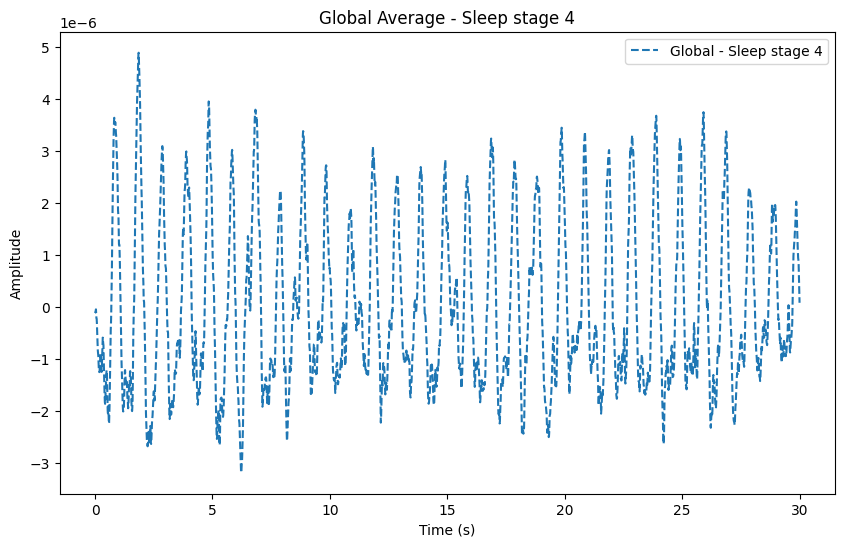

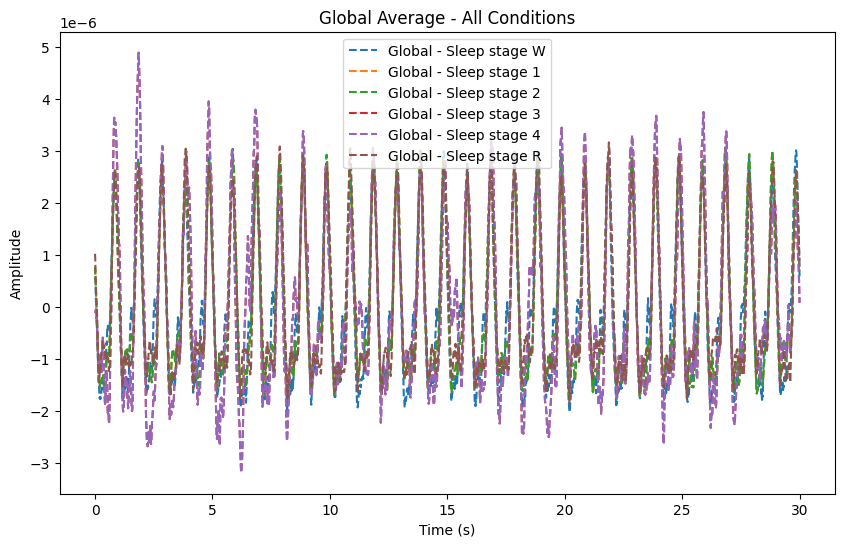

In [212]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_edf

# Define conditions to process
conditions = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R']
        

# Dictionary to store subject averages
subject_averages = {}

for idx, paths in enumerate(data_path[:5], start=1):
    rawpath, annotpath = paths[0], paths[1]
    raw = read_raw_edf(rawpath, preload=True, stim_channel="Event marker", infer_types=True) 
    raw.pick_types(eeg=True)  
    raw.filter(0.5, 30)  
    annot = mne.read_annotations(annotpath)  # Read annotations
    raw.set_annotations(annot, emit_warning=False)

    annotation_desc_2_event_id = {
        "Sleep stage W": 1,
        "Sleep stage 1": 2,
        "Sleep stage 2": 2,
        "Sleep stage 3": 3,
        "Sleep stage 4": 3,
        "Sleep stage R": 4,
    }

    events, _ = mne.events_from_annotations(
        raw, event_id=annotation_desc_2_event_id, chunk_duration=30.0
    )

    tmin = 0.0  
    tmax = 30.0  
    epochs = mne.Epochs(
        raw, events, event_id=annotation_desc_2_event_id, tmin=tmin, tmax=tmax, preload=True, baseline=None
    )

    subject_id = f"Subject {idx}"
    subject_averages[subject_id] = {cond: epochs[cond].average() for cond in conditions}

# global average for "Sleep stage W"
global_sleep_1 = [
    averages["Sleep stage 4"].data.mean(axis=0) for subject, averages in subject_averages.items()
]

# separate plot for "Sleep stage W"
plt.figure(figsize=(10, 6))
if global_sleep_1: 
    avg_data = np.mean(global_sleep_1, axis=0)  # Global average for "Sleep stage W"
    times = subject_averages['Subject 1']["Sleep stage 4"].times  # Get times from one of the subjects
    plt.plot(times, avg_data, label="Global - Sleep stage 4", linestyle='--')  # Plot the global average
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Global Average - Sleep stage 4")
    plt.legend()
    plt.show()

# global average for all conditions
global_averages = {cond: [] for cond in conditions}

for subject, averages in subject_averages.items():
    for condition in conditions:
        if condition in averages:
            global_averages[condition].append(averages[condition].data.mean(axis=0))  # Add to global list

# separate plot for all conditions
plt.figure(figsize=(10, 6))
for condition, data_list in global_averages.items():
    if data_list:
        avg_data = np.mean(data_list, axis=0)  # Global average for the condition
        plt.plot(times, avg_data, label=f"Global - {condition}", linestyle='--')  # Plot the global average

# averages for all conditions
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Global Average - All Conditions")
plt.legend()
plt.show()


Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7950 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4011E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8406 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8406 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4021E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8412 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4031E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8460 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4041E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7710 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7710 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4051E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8166 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8166 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4061E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8310 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8310 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4071E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8430 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4081E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8388 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8388 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4091E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8196 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4101E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8160 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8160 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4111E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7926 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7926 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4121E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8358 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8358 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4141E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8268 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8268 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4151E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7860 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7860 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4161E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7878 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7878 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4171E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8226 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8226 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4181E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8268 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8268 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4191E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8322 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8322 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4201E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8412 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4211E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8430 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4221E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8100 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4231E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8238 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8238 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4241E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8106 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8106 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4251E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8280 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4261F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8400 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8400 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4271F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7320 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7320 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4281G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8364 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8364 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4291G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8268 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8268 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4301E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7938 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7938 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4311E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8010 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8010 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4321E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8070 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8070 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4331F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8430 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4341F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8250 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8250 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4351F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8130 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4371F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8550 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8550 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4381F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8250 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8250 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4401E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7890 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7890 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4411E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8184 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4421E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8292 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8292 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4431E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8430 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4441E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7860 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7860 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4451F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8370 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8370 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4461F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8088 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8088 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4471F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8220 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8220 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4481F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8640 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8640 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4491G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8400 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8400 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4501E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8250 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8250 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4511E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8136 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8136 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4531E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7806 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7806 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4541F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8220 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8220 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4551F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8316 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8316 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4561F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8112 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8112 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4571F0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8550 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8550 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4581G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8214 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8214 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4591G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8460 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4601E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8190 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8190 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4611E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7950 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4621E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7836 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7836 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4631E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8274 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8274 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4641E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8040 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8040 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4651E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8580 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8580 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4661E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8220 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8220 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4671G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8340 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8340 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4701E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8040 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8040 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4711E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8190 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8190 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4721E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7026 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7026 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4731E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8340 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8340 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4741E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8070 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8070 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4751E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8040 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8040 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4761E0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7890 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7890 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4771G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8268 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8268 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4801G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8322 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8322 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4811G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
7206 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 7206 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Extracting EDF parameters from C:\Users\rebec\mne_data\physionet-sleep-data\SC4821G0-PSG

C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(rawpath, preload=True)
C:\Users\rebec\AppData\Local\Temp\ipykernel_29916\3088130960.py:14: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = read_raw_edf(rawpath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (6.610 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8166 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8166 events and 1000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


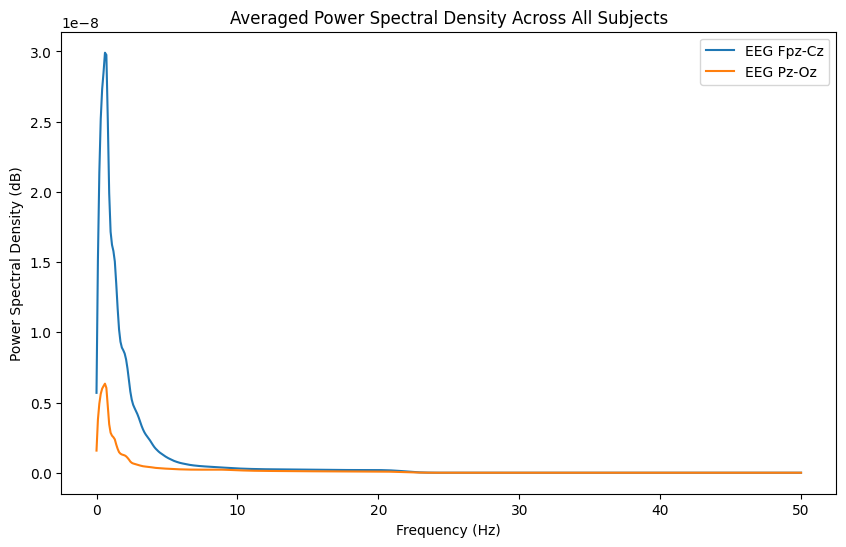

In [162]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne import create_info, make_fixed_length_epochs
from mne.io import read_raw_edf, RawArray
from scipy.integrate import simpson



psd_data = []  # for each subject 

for paths in data_path:
    rawpath, annotpath = paths[0], paths[1]
    raw = read_raw_edf(rawpath, preload=True)
    annotation_raw = mne.read_annotations(annotpath)
    raw.set_annotations(annot_raw, emit_warning=False)
    
    #filtering pre-processing
    raw.filter(0.5, 20) #  band-pass filter - change this however we like 
    raw.pick_channels(['EEG Fpz-Cz', 'EEG Pz-Oz'])  
    # creating epochs 
    epochs = make_fixed_length_epochs(raw, duration=10, preload=True)
    # psd for epochs
    spectrum = epochs.compute_psd()
    psd = spectrum.get_data()  # (n_epochs, n_channels, n_freqs)
    psd_data.append(psd)

# average psd per subject
average_psd_per_subject = [np.average(psd, axis=0) for psd in psd_data]
# average across all subjects
average_psd_all_subjects = np.average(average_psd_per_subject, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(spectrum.freqs, average_psd_all_subjects[0], label='EEG Fpz-Cz')
plt.plot(spectrum.freqs, average_psd_all_subjects[1], label='EEG Pz-Oz')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB)")
plt.title("Averaged Power Spectral Density Across All Subjects")
plt.legend()
plt.show()


## Project Part 2: Feature Extraction